# E: Ejemplo real de calibración. Tercera fase: *flats*

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import numpy as np
import glob
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
import os
from imstats import imstats

In [2]:
directorioCalibracion = 'salidas/salidaCalibracion/'

superBias = fits.open(directorioCalibracion + "superBias.fit")[0].data
superDark = fits.open(directorioCalibracion + "superDark.fit")[0].data
darkCurrent = fits.open(directorioCalibracion + "darkCurrent.fit")[0].data

## Apertura de los *flats*

Procedemos de la misma forma que con los *darks* y con los *bias*.

In [3]:
# ls imagenes\calibracionImagenes\flats\*.fit

In [4]:
flats_list = sorted(glob.glob('imagenes/calibracionImagenes/flats/ha/*.fit'))
flats_list

['imagenes/calibracionImagenes/flats/ha/Telescope3_FLAT_Flash9000ms_H-alpha_1x1_10s_-30degC_20200120_0400_000000685.fit',
 'imagenes/calibracionImagenes/flats/ha/Telescope3_FLAT_Flash9000ms_H-alpha_1x1_10s_-30degC_20200120_0400_000000686.fit',
 'imagenes/calibracionImagenes/flats/ha/Telescope3_FLAT_Flash9000ms_H-alpha_1x1_10s_-30degC_20200120_0401_000000687.fit',
 'imagenes/calibracionImagenes/flats/ha/Telescope3_FLAT_Flash9000ms_H-alpha_1x1_10s_-30degC_20200120_0401_000000688.fit',
 'imagenes/calibracionImagenes/flats/ha/Telescope3_FLAT_Flash9000ms_H-alpha_1x1_10s_-30degC_20200120_0401_000000689.fit',
 'imagenes/calibracionImagenes/flats/ha/Telescope3_FLAT_Flash9000ms_H-alpha_1x1_10s_-30degC_20200120_0402_000000690.fit',
 'imagenes/calibracionImagenes/flats/ha/Telescope3_FLAT_Flash9000ms_H-alpha_1x1_10s_-30degC_20200120_0402_000000691.fit',
 'imagenes/calibracionImagenes/flats/ha/Telescope3_FLAT_Flash9000ms_H-alpha_1x1_10s_-30degC_20200120_0402_000000692.fit',
 'imagenes/calibracionIm

In [5]:
flats_data = []
flats_header = []
for flat in flats_list:
    hdul_flats = fits.open(flat)
    flats_data.append(hdul_flats[0].data) 
    flats_header.append(hdul_flats[0].header)
    hdul_flats.close()

In [6]:
hdul_flats[0].header['IMAGETYP']

'Flat Field'

## Inspección de los *flats*

In [7]:
median_flats = []
mean_flats = []
std_flats = []
for flat in range(len(flats_list)):
    median_flats.append(np.nanmedian(flats_data[flat]))
    mean_flats.append(np.nanmean(flats_data[flat]))
    std_flats.append(np.nanstd(flats_data[flat]))
    print(imstats(flats_data[flat]))

{'npix': 16777216, 'min': 6722, 'max': 28008, 'mean': 8602.147014081478, 'median': 8647.0, 'std': 261.2341604168225}
{'npix': 16777216, 'min': 6758, 'max': 28205, 'mean': 8636.487374663353, 'median': 8682.0, 'std': 262.3035702390559}
{'npix': 16777216, 'min': 6808, 'max': 28169, 'mean': 8643.709971249104, 'median': 8689.0, 'std': 262.3154026526392}
{'npix': 16777216, 'min': 6765, 'max': 27902, 'mean': 8646.771433115005, 'median': 8692.0, 'std': 262.3137619317805}
{'npix': 16777216, 'min': 6784, 'max': 28342, 'mean': 8648.473283410072, 'median': 8694.0, 'std': 262.3499764266245}
{'npix': 16777216, 'min': 6751, 'max': 28271, 'mean': 8649.493419468403, 'median': 8695.0, 'std': 262.33924653326767}
{'npix': 16777216, 'min': 6773, 'max': 28313, 'mean': 8649.730369627476, 'median': 8695.0, 'std': 262.26323493984074}
{'npix': 16777216, 'min': 6739, 'max': 28213, 'mean': 8649.57320278883, 'median': 8695.0, 'std': 262.37674152764976}
{'npix': 16777216, 'min': 6768, 'max': 28266, 'mean': 8650.428

### Graficamos la media y mediana

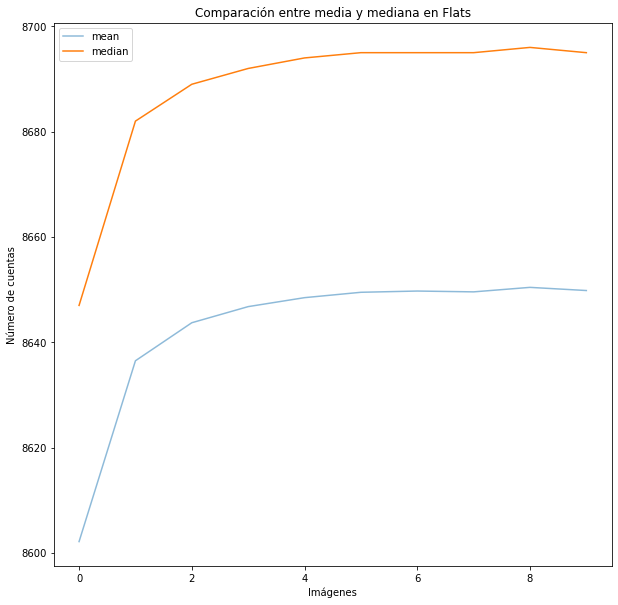

In [8]:
plt.figure("Flats", figsize=[10, 10])
plt.plot(np.arange(0,len(flats_list)),mean_flats, alpha=0.5, label='mean')
plt.plot(np.arange(0,len(flats_list)), median_flats, label='median')

plt.title('Comparación entre media y mediana en Flats')
plt.xlabel('Imágenes')
plt.ylabel('Número de cuentas')
plt.legend()
#plt.imshow(stacked, vmin=1000, vmax=2000, origin='lower')
#plt.colorbar(label='Counts')
plt.show()

### Graficamos la desviación estándar

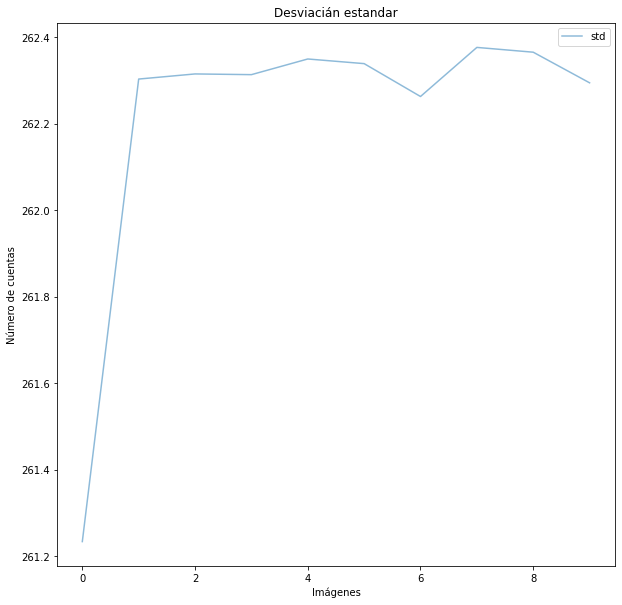

In [9]:
plt.figure("Flats", figsize=[10, 10])
plt.plot(np.arange(0,len(flats_list)),std_flats, alpha=0.5, label='std')

plt.title('Desviacián estandar')
plt.xlabel('Imágenes')
plt.ylabel('Número de cuentas')
plt.legend()
#plt.imshow(stacked, vmin=1000, vmax=2000, origin='lower')
#plt.colorbar(label='Counts')
plt.show()

## Eliminación de *flats*

In [10]:
for r in range(len(flats_list)):
    if std_flats[r] > np.median(std_flats)*1.1:
        print(bias_list[r])
        bias_list.remove(bias_list[r])

## Determinación del centro de las imágenes

Determinamos el centro de mi imagen (se usará más adelante). El método ```.shape()``` de la biblioteca ```numpy``` nos permite obtener las dimensiones de la matriz que compone mi imagen. El centro de la imagen será la parte entera de la mitad de los valores ofrecidos por ```.shape()```.

In [11]:
y_len, x_len = np.shape(flats_data[0])
y_center, x_center = y_len//2, x_len//2

## Graficamos los *flats*

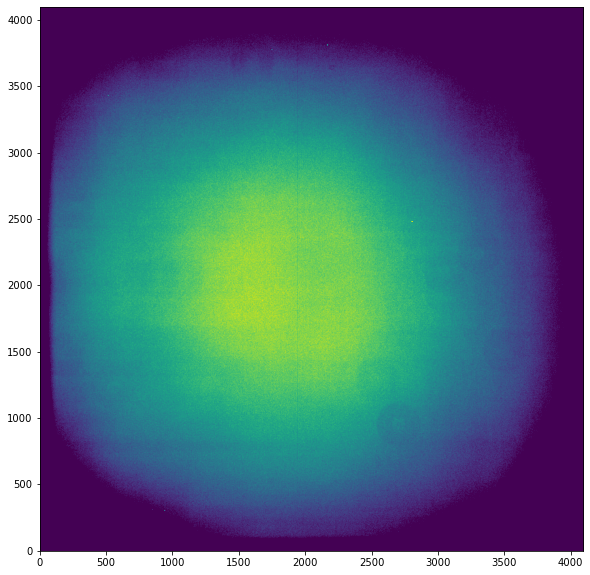

In [12]:
plt.figure("Flats", figsize=[10, 10])
plt.imshow(flats_data[0], vmin=8500, vmax=9000, origin='lower')

## Busqueda de una región donde normalizar los *flats*

Los flats hay que normalizarlos ya que van a estar dividiendo a los *lights*. Por lo tanto necesito seleccionar una región en donde tener un promedio de un valor máximo al cual le asignaremos el valor ```1.0``` y a medida que me voy alejando hacia los bordes o esquinas de la imagen dicho valor irá disminuyendo (debido al viñeteo del tren óptico).

Como ya hemos calculado el centro de la imagen y es ahí donde se supone que el sensor recibe mas luz (donde menos viñetea) calculamos un valor máximo en una region centrada en el centro de la imagen.

En este caso al ser una imagen grande nos centramos en un *ROI* (*Region Of Interest*) de 500x500 pixeles en el centro de la imagen.

<ipython-input-13-51042aed55fb>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_center, y_center, 'bo', color='r')


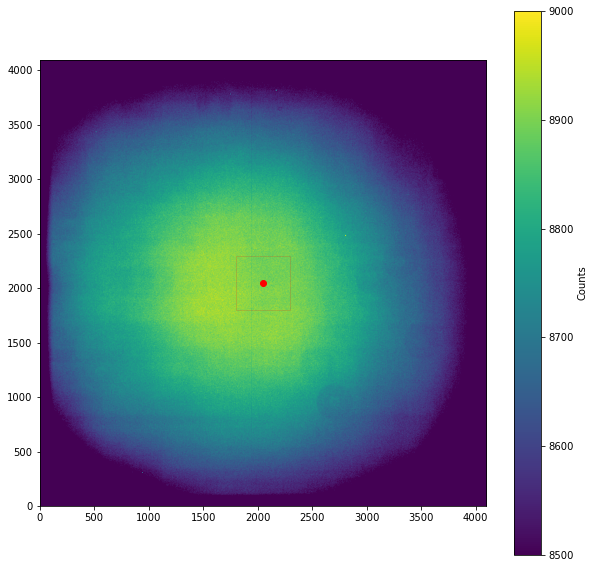

In [13]:
# Obtener ROI en el centro de la imagen
plt.figure("Flats", figsize=[10, 10])
plt.imshow(flats_data[0], vmin=8500, vmax=9000, origin='lower')
plt.colorbar(label='Counts')

ax = plt.gca()
ancho = 500
rect = patches.Rectangle((x_center- ancho/2, y_center - ancho/2), ancho, ancho, linewidth=0.5, edgecolor='red', alpha=0.3, fill = False, angle=0)
ax.add_patch(rect)
plt.plot(x_center, y_center, 'bo', color='r')

plt.show()

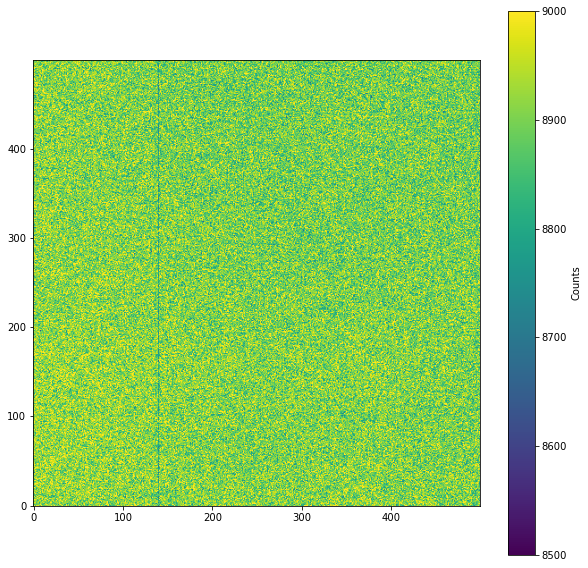

In [14]:
plt.figure("Flats", figsize=[10, 10])
plt.imshow(flats_data[0][y_center-250:y_center+250,x_center-250:x_center+250], vmin=8500, vmax=9000, origin='lower')
plt.colorbar(label='Counts')
plt.show()

## Supresión del *superbias* y normalización

Restamos el *superbias* a los *flats* y se normalizan por la media de *ROI* obtenido.

In [15]:
flat_data_b = []
for flat in range(5):#len(flats_list)):
    flat_superBias =  flats_data[flat] - superBias
    flat_norm = flat_superBias / np.median(flat_superBias[y_center-250:y_center+250,x_center-250:x_center+250])
    flat_data_b.append(flat_norm)

## Creación del *superflat*

In [16]:
superFlat = np.nanmedian(flat_data_b, axis=0)

In [17]:
imstats(superFlat)

{'npix': 16777216,
 'min': 0.73361015,
 'max': 3.3576193,
 'mean': 0.96213907,
 'median': 0.9681641,
 'std': 0.03212095}

### Graficamos el *superflat*

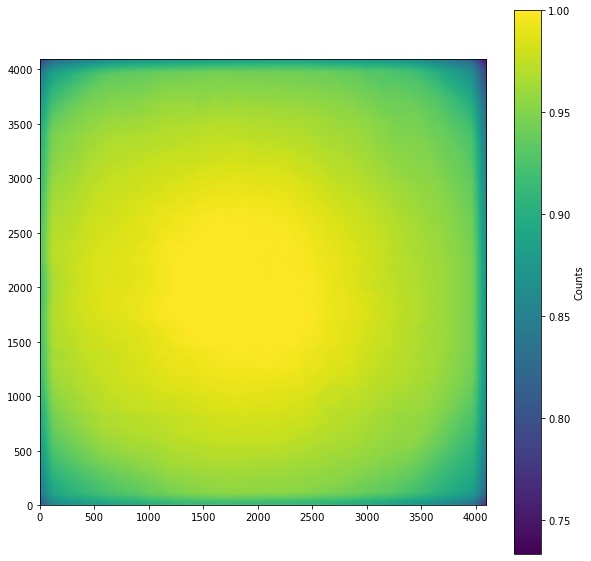

In [18]:
plt.figure("SuperFlat", figsize=[10, 10])
plt.imshow(superFlat, vmin=imstats(superFlat)['min'], vmax=1, origin='lower')
plt.colorbar(label='Counts')
plt.show()

## Comprobación de la normalización correcta del *superflat*

<Figure size 432x288 with 0 Axes>

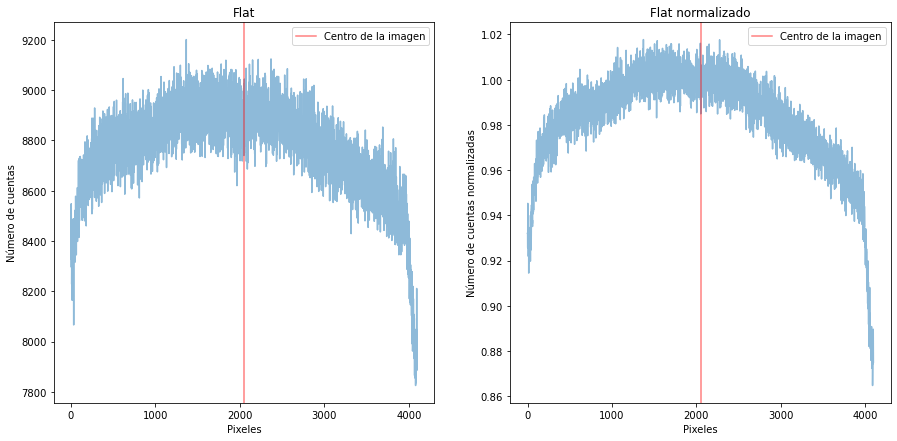

In [19]:
%matplotlib inline
plt.figure("Scatter")

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 7))

ax1.plot(np.arange(0,len(flats_data[0][y_center,:])),flats_data[0][y_center,:], alpha=0.5)#, label='flat normalizado')

ax1.set_ylabel('Número de cuentas')
ax1.set_xlabel('Pixeles')
ax1.set_title('Flat')
ax1.axvline(x=x_center, ymin=0, ymax=1,color='r',alpha=0.5, label='Centro de la imagen')
ax1.legend()

ax2.plot(np.arange(0,len(superFlat[y_center,:])),superFlat[y_center,:], alpha=0.5)#, label='flat normalizado')

ax2.set_ylabel('Número de cuentas normalizadas')
ax2.set_xlabel('Pixeles')
ax2.set_title('Flat normalizado')
ax2.axvline(x=x_center, ymin=0, ymax=1,color='r',alpha=0.5, label='Centro de la imagen')

ax2.legend()

#plt.xlim(np.nanmin(np.array(gal_par['petroR90_r'])[mask_BinNum]), np.nanmax(np.array(gal_par['petroR90_r'])[mask_BinNum]))

#ax2.savefig('color_mag_816.png')
#plt.savefig('color_mag.png')
plt.show()


## Guardado del *superflat*

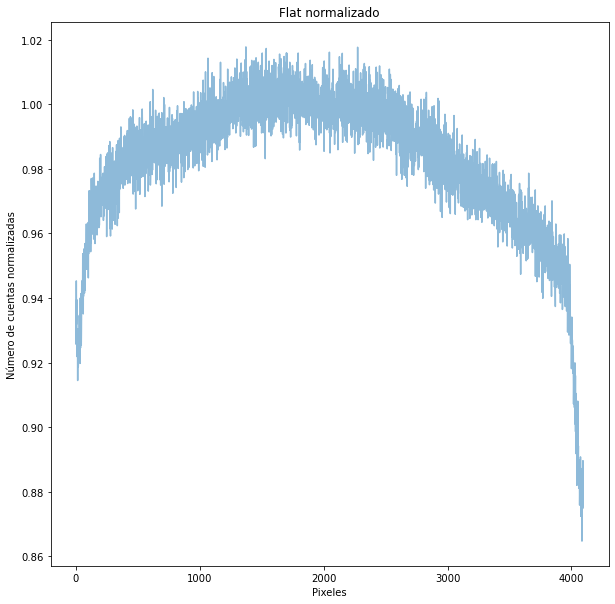

In [20]:
plt.figure("Flat", figsize=[10, 10])
plt.plot(np.arange(0,len(superFlat[y_center,:])),superFlat[y_center,:], alpha=0.5)#, label='flat normalizado')

plt.title('Flat normalizado')
plt.xlabel('Pixeles')
plt.ylabel('Número de cuentas normalizadas')
#plt.legend()
#plt.imshow(stacked, vmin=1000, vmax=2000, origin='lower')
#plt.colorbar(label='Counts')
plt.show()

In [21]:
hdu_FlatH = fits.PrimaryHDU(data=superFlat.astype(np.float32), header=flats_header[0])
hdu_FlatH.writeto(directorioCalibracion + "superFlat.fit",overwrite=True)